<a href="https://colab.research.google.com/github/Abhinav0358/Analysis-of-startup-fundings-CL205-Course-Project/blob/main/Indian_startup_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# Set the path to the file you'd like to load
file_path = "startup_funding.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sudalairajkumar/indian-startup-funding",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df

/tmp/ipython-input-3149509891.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 416k/416k [00:01<00:00, 415kB/s]


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [ ]:
# Clean and format the data, including converting the 'Date dd/mm/yyyy' column to datetime objects and extracting the year
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
df['year'] = df['Date dd/mm/yyyy'].dt.year

df['Amount in USD'] = df['Amount in USD'].astype(str).str.replace(',', '', regex=False).str.replace('[^0-9.]', '', regex=True)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

In [ ]:
# Group the data by year and count the number of startups to find the number of startups funded per year
startups_per_year = df.groupby('year').size().reset_index(name='Number of Startups')
display(startups_per_year)

,year,Number of Startups
0,2015.0,929
1,2016.0,993
2,2017.0,687
3,2018.0,309
4,2019.0,111
5,2020.0,7


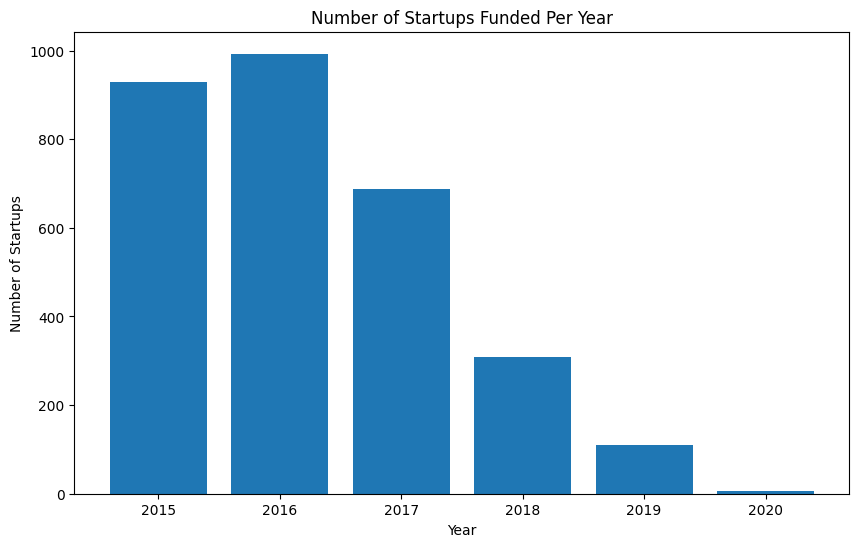

In [ ]:
# bar chart showing the number of startups funded per year.
plt.figure(figsize=(10, 6))
plt.bar(startups_per_year['year'], startups_per_year['Number of Startups'])
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Funded Per Year')
plt.show()

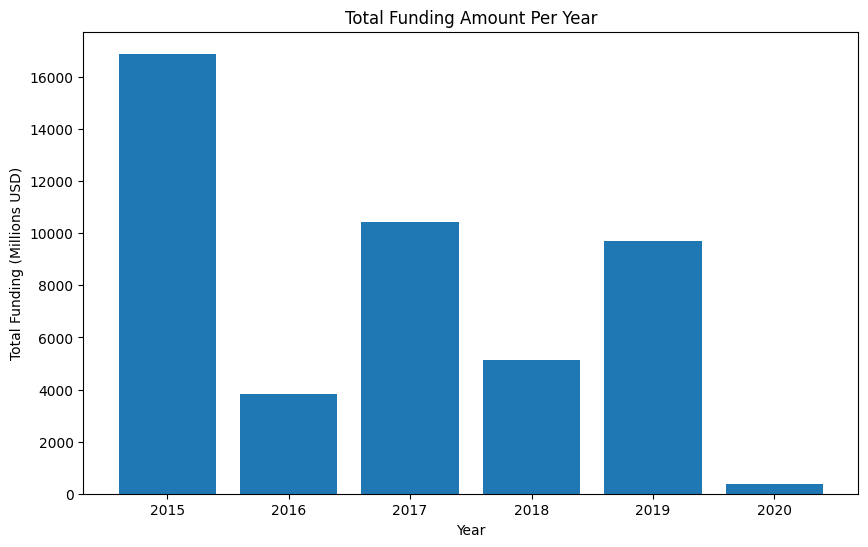

In [ ]:
# Group by year and sum the funding amount
funding_by_year = df.groupby('year')['Amount in USD'].sum().reset_index(name='total_funding')

plt.figure(figsize=(10, 6))
plt.bar(funding_by_year['year'], funding_by_year['total_funding'])
plt.xlabel('Year')
plt.ylabel('Total Funding (Millions USD)')
plt.title('Total Funding Amount Per Year')
plt.ticklabel_format(style='plain', axis='y') # Remove scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000000:.0f}')) # Format as millions
plt.show()

,count
InvestmentnType,
Private Equity,44.605263
Seed Funding,44.572368
Seed/ Angel Funding,1.973684
Seed / Angel Funding,1.546053
Others,7.302632


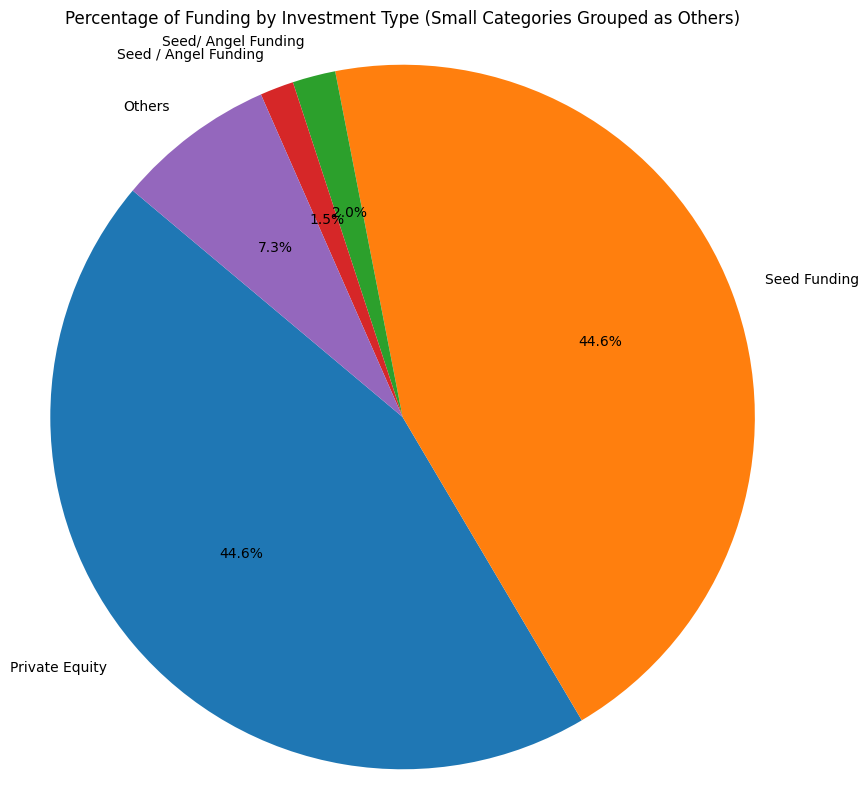

In [ ]:
investment_type_counts = df['InvestmentnType'].value_counts()

# Define a threshold for small percentages
threshold = 1 # You can adjust this threshold as needed

# Group small percentages into 'Others'
investment_type_percentages = investment_type_counts / investment_type_counts.sum() * 100
small_percentages = investment_type_percentages[investment_type_percentages < threshold].sum()
large_percentages = investment_type_percentages[investment_type_percentages >= threshold]

# Create a new series for plotting
plot_percentages = large_percentages.copy()
plot_percentages['Others'] = small_percentages

display(plot_percentages)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(plot_percentages, labels=plot_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Funding by Investment Type (Small Categories Grouped as Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




Group the DataFrame by the 'Industry Vertical' column and count the number of startups in each vertical, then store the result in a new DataFrame and display it.



In [ ]:
# Group by industry vertical and count the number of startups
startups_per_industry = df.groupby('Industry Vertical').size().reset_index(name='Number of Startups')

# Define a threshold for grouping
threshold = 10

# Identify industries below the threshold
industries_below_threshold = startups_per_industry[startups_per_industry['Number of Startups'] < threshold]

# Calculate the total number of startups in the 'Others' category
others_count = industries_below_threshold['Number of Startups'].sum()

# Filter out industries below the threshold from the original DataFrame
prominent_industries = startups_per_industry[startups_per_industry['Number of Startups'] >= threshold]

# Create a new row for the 'Others' category
others_row = pd.DataFrame([{'Industry Vertical': 'Others', 'Number of Startups': others_count}])

# Concatenate the prominent industries and the 'Others' row
startups_per_industry_grouped = pd.concat([prominent_industries, others_row], ignore_index=True)

# Sort by number of startups in descending order for better visualization
startups_per_industry_grouped = startups_per_industry_grouped.sort_values(by='Number of Startups', ascending=False)

display(startups_per_industry_grouped)

,Industry Vertical,Number of Startups
0,Consumer Internet,941
12,Others,941
10,Technology,478
11,eCommerce,186
8,Healthcare,70
6,Finance,62
3,ECommerce,61
9,Logistics,32
1,E-Commerce,29
5,Education,24



Create a bar chart to visualize the number of startups funded per industry vertical using the `startups_per_industry` DataFrame.



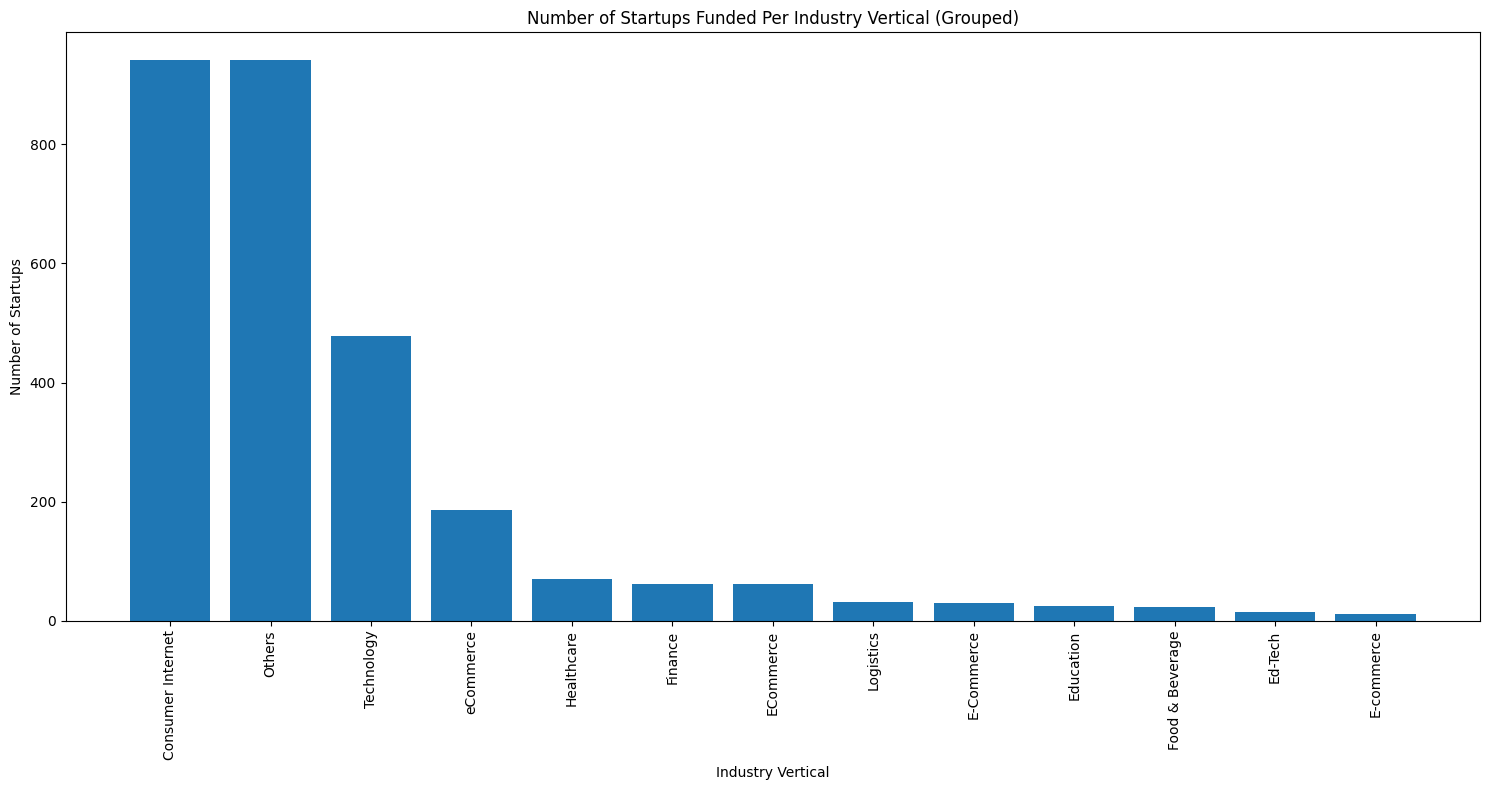

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(startups_per_industry_grouped['Industry Vertical'], startups_per_industry_grouped['Number of Startups'])
plt.xlabel('Industry Vertical')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Funded Per Industry Vertical (Grouped)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

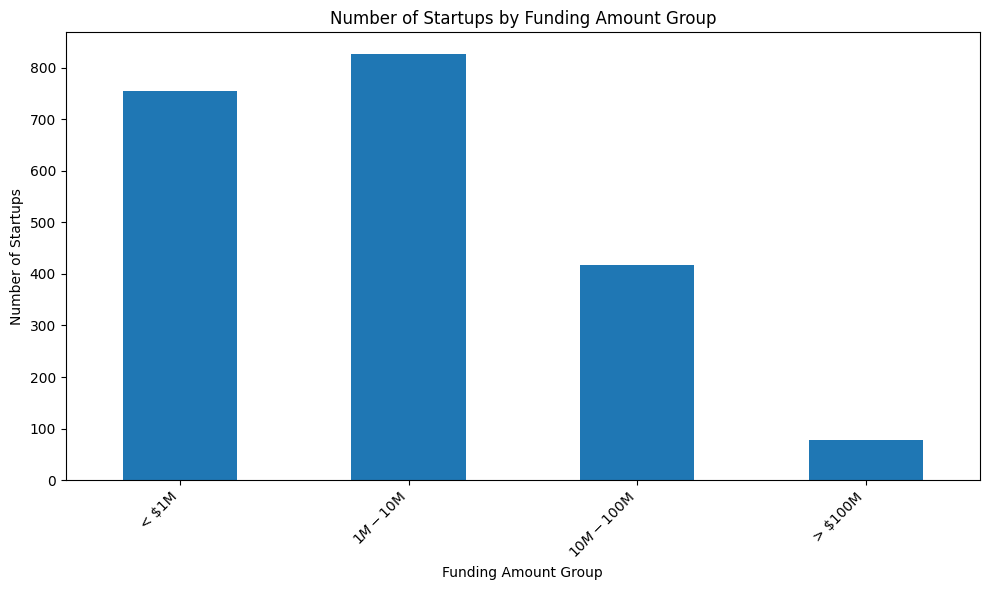

In [ ]:
# Define funding amount ranges
bins = [0, 1000000, 10000000, 100000000, df['Amount in USD'].max()]
labels = ['< $1M', '$1M - $10M', '$10M - $100M', '> $100M']

# Create a new column with funding amount groups
df['Funding Group'] = pd.cut(df['Amount in USD'], bins=bins, labels=labels, right=False)

# Plot a histogram of the funding groups
plt.figure(figsize=(10, 6))
df['Funding Group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Funding Amount Group')
plt.ylabel('Number of Startups')
plt.title('Number of Startups by Funding Amount Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Group by city and count the number of startups
startups_per_city = df['City  Location'].value_counts().reset_index(name='Number of Startups')
startups_per_city.rename(columns={'index': 'City'}, inplace=True)
display(startups_per_city)

,City Location,Number of Startups
0,Bangalore,700
1,Mumbai,567
2,New Delhi,421
3,Gurgaon,287
4,Bengaluru,141
...,...,...
107,India / US,1
108,\\xc2\\xa0Bangalore,1
109,\\xc2\\xa0Mumbai,1
110,New Delhi / California,1


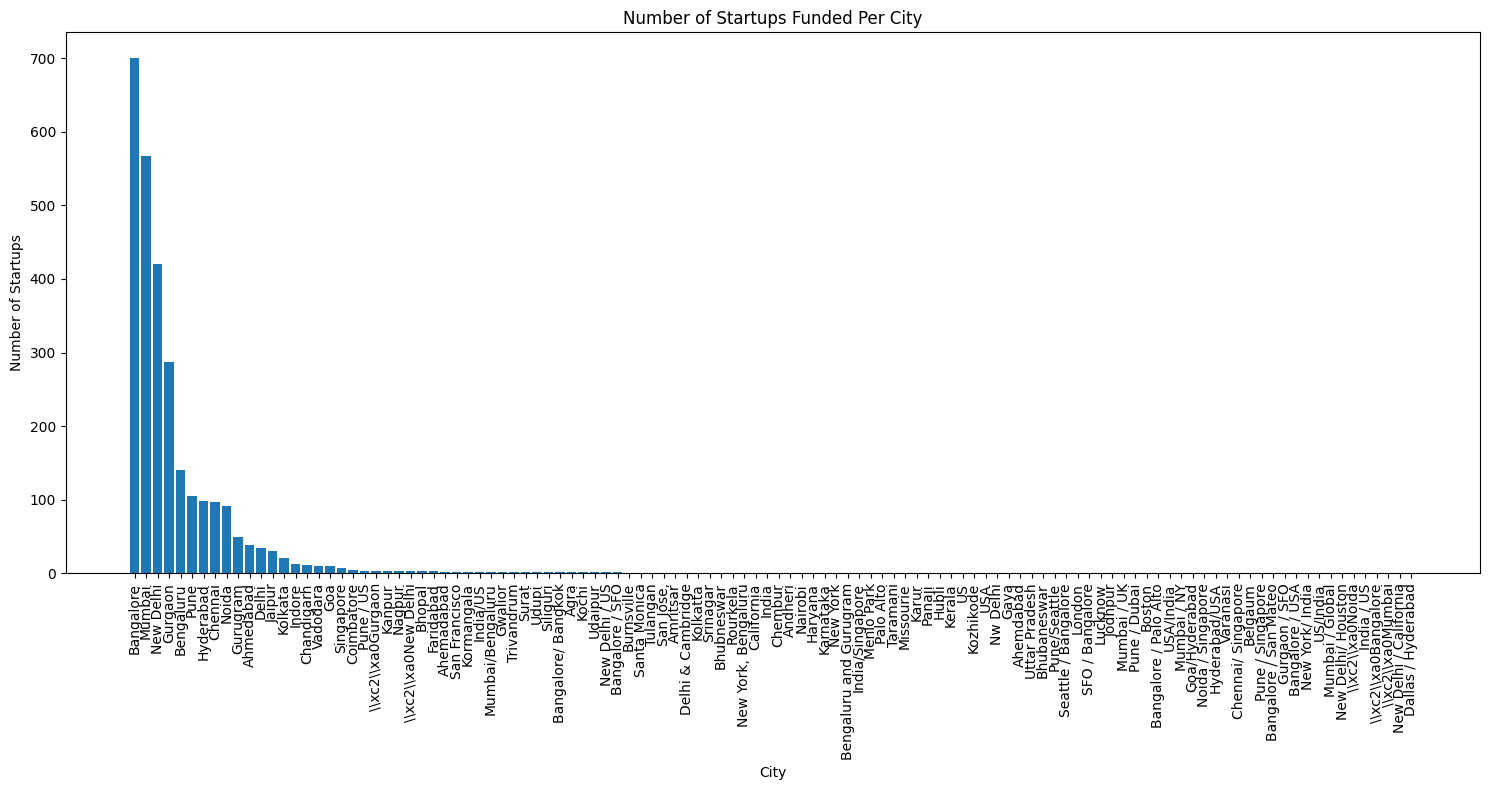

In [ ]:
# Plot a bar chart of startups per city
plt.figure(figsize=(15, 8))
plt.bar(startups_per_city['City  Location'], startups_per_city['Number of Startups'])
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Funded Per City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

,year,Average Funding
0,2015.0,2.590252e+07
1,2016.0,6.532574e+06
2,2017.0,2.287129e+07
3,2018.0,1.937924e+07
4,2019.0,9.238970e+07
5,2020.0,5.574389e+07


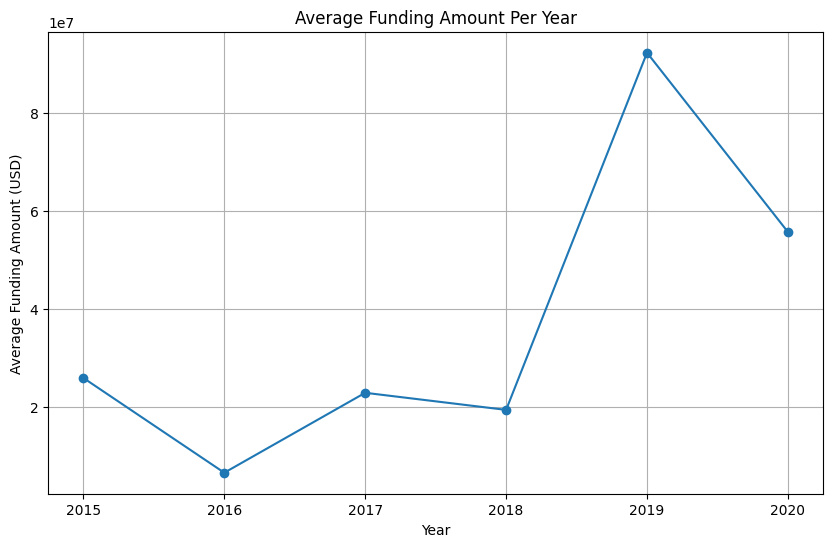

In [ ]:
# Calculate average funding per year
average_funding_per_year = df.groupby('year')['Amount in USD'].mean().reset_index(name='Average Funding')
display(average_funding_per_year)

# Plot average funding per year using a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_funding_per_year['year'], average_funding_per_year['Average Funding'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Funding Amount (USD)')
plt.title('Average Funding Amount Per Year')
plt.grid(True)
plt.show()

Total number of undisclosed investors: 106


,Investors Name,Number of Startups
1647,Ratan Tata,25
905,Indian Angel Network,23
1042,Kalaari Capital,16
741,Group of Angel Investors,15
1836,Sequoia Capital,15
60,Accel Partners,12
399,Brand Capital,11
2231,Venture Catalysts,11
1726,SAIF Partners,10
1710,RoundGlass Partners,10


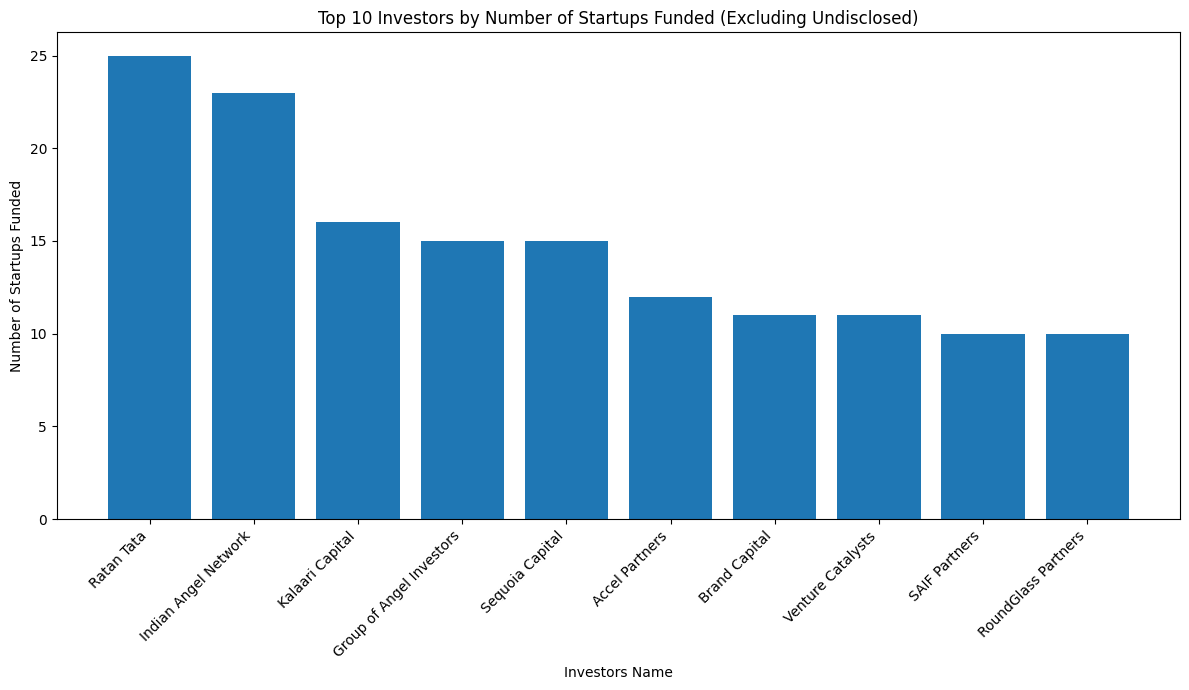

In [ ]:
# Group by Investors Name and count the number of startups
investors_counts = df['Investors Name'].value_counts().reset_index(name='Number of Startups')
investors_counts.rename(columns={'index': 'Investors Name'}, inplace=True)

# Group similar undisclosed investor names
undisclosed_variations = ['Undisclosed Investors', 'Undisclosed investors', 'Undisclosed', 'undisclosed investor','Undisclosed Investor','undisclosed investors']
investors_counts['Investors Name'] = investors_counts['Investors Name'].replace(undisclosed_variations, 'Undisclosed Investors')

# Recalculate counts after grouping
investors_counts = investors_counts.groupby('Investors Name').sum().reset_index()

# Get the count of undisclosed investors
undisclosed_count = investors_counts[investors_counts['Investors Name'] == 'Undisclosed Investors']['Number of Startups'].sum()

# Filter out undisclosed investors for plotting
top_n_investors_excluding_undisclosed = investors_counts[investors_counts['Investors Name'] != 'Undisclosed Investors'].sort_values(by='Number of Startups', ascending=False).head(10)

# Display the number of undisclosed investors
print(f"Total number of undisclosed investors: {undisclosed_count}")
display(top_n_investors_excluding_undisclosed)

# Plot a bar chart of top investors (excluding undisclosed)
plt.figure(figsize=(12, 7))
plt.bar(top_n_investors_excluding_undisclosed['Investors Name'], top_n_investors_excluding_undisclosed['Number of Startups'])
plt.xlabel('Investors Name')
plt.ylabel('Number of Startups Funded')
plt.title('Top 10 Investors by Number of Startups Funded (Excluding Undisclosed)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()